In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\CHETAK\Downloads\tour_package.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
s=df.value_counts()
print(s)

CustomerID  ProdTaken  Age   TypeofContact    CityTier  DurationOfPitch  Occupation      Gender  NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  Designation     MonthlyIncome
200000      1          41.0  Self Enquiry     3         6.0              Salaried        Female  3                       3.0                Deluxe          3.0                    Single         1.0            1         2                       1       0.0                       Manager         20993.0          1
203397      1          45.0  Self Enquiry     1         10.0             Salaried        Male    3                       4.0                Basic           5.0                    Divorced       6.0            0         5                       1       2.0                       Executive       21040.0          1
203363      0          60.0  Self Enquiry     1         25.0         

In [11]:
df.axes

[RangeIndex(start=0, stop=4888, step=1),
 Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
        'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
        'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
        'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
       dtype='object')]

In [12]:
# from above we have null values as well as we have cateogorical data we 
# have to fill null values and convert all data in numeric form

In [13]:
df['Age']

0       41.0
1       49.0
2       37.0
3       33.0
4        NaN
        ... 
4883    49.0
4884    28.0
4885    52.0
4886    19.0
4887    36.0
Name: Age, Length: 4888, dtype: float64

In [14]:
df['Age'].mean()

37.62226512226512

In [15]:
df['Age'].median()

36.0

In [17]:
df['Age'].mode()

0    35.0
dtype: float64

In [22]:
df['Age']=df['Age'].fillna(36)
df['Age'].isna().sum()


0

In [24]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [25]:
df['TypeofContact'].isna().sum()

25

In [27]:
df['TypeofContact'].mode()

0    Self Enquiry
dtype: object

In [28]:
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')

In [29]:
df['TypeofContact'].isna().sum()

0

In [32]:
df['DurationOfPitch'].isna().sum()

251

In [33]:
df['DurationOfPitch'].median()

13.0

In [34]:
df['DurationOfPitch']=df['DurationOfPitch'].fillna(13)

In [35]:
df['DurationOfPitch'].isna().sum()

0

In [37]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [39]:
df['NumberOfFollowups'].isna().sum()

45

In [40]:
df['NumberOfFollowups'].median()

4.0

In [41]:
df['NumberOfFollowups'].mean()

3.708445178608301

In [42]:
df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(4)

In [43]:
df['NumberOfFollowups'].isna().sum()

0

In [60]:
df['PreferredPropertyStar'].isna().sum()

26

In [61]:
df['PreferredPropertyStar'].median()

3.0

In [62]:
df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(3)

In [44]:
df['NumberOfTrips'].isna().sum()

140

In [45]:
df['NumberOfTrips'].median()

3.0

In [46]:
df['NumberOfTrips']=df['NumberOfTrips'].fillna(3)

In [47]:
df['NumberOfTrips'].isna().sum()

0

In [48]:
df['NumberOfChildrenVisiting'].isna().sum()

66

In [49]:
df['NumberOfChildrenVisiting'].median()

1.0

In [50]:
df['NumberOfChildrenVisiting'].mean()

1.1872666943177106

In [51]:
df['NumberOfChildrenVisiting'].mode()

0    1.0
dtype: float64

In [52]:
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(1)

In [53]:
df['NumberOfChildrenVisiting'].isna().sum()

0

In [54]:
df['MonthlyIncome'].isna().sum()

233

In [55]:
df['MonthlyIncome'].mean()

23619.85349087003

In [56]:
df['MonthlyIncome'].median()

22347.0

In [57]:
df['MonthlyIncome'].mode()

0    17342.0
1    20855.0
2    21020.0
3    21288.0
dtype: float64

In [58]:
df['MonthlyIncome']=df['MonthlyIncome'].fillna(22350)

In [63]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [64]:
# now we fill all null values now there are no null values in our data
# now we have convert all colums in numeric

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [66]:
df['TypeofContact'].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [67]:
df['TypeofContact'].value_counts().to_dict()

{'Self Enquiry': 3469, 'Company Invited': 1419}

In [69]:
df['TypeofContact'].replace({'Self Enquiry': 1, 'Company Invited': 0},inplace=True)

In [71]:
df['TypeofContact'].dtype

dtype('int64')

In [72]:
df['Occupation'].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [73]:
df['Occupation'].value_counts().to_dict()

{'Salaried': 2368,
 'Small Business': 2084,
 'Large Business': 434,
 'Free Lancer': 2}

In [74]:
df['Occupation'].replace({'Salaried': 4,
 'Small Business': 3,
 'Large Business': 2,
 'Free Lancer': 1},inplace=True)

In [76]:
df['Gender'].value_counts().to_dict()

{'Male': 2916, 'Female': 1817, 'Fe Male': 155}

In [77]:
df['Gender'].replace({'Male': 2, 'Female': 1, 'Fe Male': 0},inplace=True)

In [79]:
df['ProductPitched'].value_counts().to_dict()

{'Basic': 1842,
 'Deluxe': 1732,
 'Standard': 742,
 'Super Deluxe': 342,
 'King': 230}

In [80]:
df['ProductPitched'].replace({'Basic': 0,
 'Deluxe': 1,
 'Standard': 2,
 'Super Deluxe': 4,
 'King': 5},inplace=True)

In [81]:
df['MaritalStatus'].value_counts().to_dict()

{'Married': 2340, 'Divorced': 950, 'Single': 916, 'Unmarried': 682}

In [82]:
df['MaritalStatus'].replace({'Married': 3, 'Divorced': 2, 'Single': 1, 'Unmarried':0},inplace=True)

In [84]:
df['Designation'].value_counts().to_dict()

{'Executive': 1842,
 'Manager': 1732,
 'Senior Manager': 742,
 'AVP': 342,
 'VP': 230}

In [85]:
df['Designation'].replace({'Executive': 5,
 'Manager': 4,
 'Senior Manager': 3,
 'AVP': 2,
 'VP': 1},inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   int64  
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   int64  
 7   Gender                    4888 non-null   int64  
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   int64  
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   int64  
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [91]:
# now our whole data is numeric and not null therfore we are ready to train our model

In [92]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,1,3,6.0,4,1,3,3.0,1,3.0,1,1.0,1,2,1,0.0,4,20993.0
1,200001,0,49.0,0,1,14.0,4,2,3,4.0,1,4.0,2,2.0,0,3,1,2.0,4,20130.0
2,200002,1,37.0,1,1,8.0,1,2,3,4.0,0,3.0,1,7.0,1,3,0,0.0,5,17090.0
3,200003,0,33.0,0,1,9.0,4,1,2,3.0,0,3.0,2,2.0,1,5,1,1.0,5,17909.0
4,200004,0,36.0,1,1,8.0,3,2,2,3.0,0,4.0,2,1.0,0,5,1,0.0,5,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,1,3,9.0,3,2,3,5.0,1,4.0,0,2.0,1,1,1,1.0,4,26576.0
4884,204884,1,28.0,0,1,31.0,4,2,4,5.0,0,3.0,1,3.0,1,3,1,2.0,5,21212.0
4885,204885,1,52.0,1,3,17.0,4,1,4,4.0,2,4.0,3,7.0,0,1,1,3.0,3,31820.0
4886,204886,1,19.0,1,3,16.0,3,2,3,4.0,0,3.0,1,3.0,0,5,0,2.0,5,20289.0


In [94]:
x=df.drop('ProdTaken',axis=1)
y=df['ProdTaken']


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10,stratify=y)


In [98]:
x_train.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
867,200867,50.0,0,1,8.0,3,1,1,3.0,4,5.0,2,3.0,0,3,1,0.0,2,32856.0
394,200394,31.0,1,1,13.0,3,1,2,3.0,1,5.0,2,2.0,0,2,1,0.0,4,22350.0
3404,203404,42.0,0,3,7.0,3,1,4,4.0,1,5.0,3,2.0,0,3,0,2.0,4,22781.0
3198,203198,34.0,0,3,15.0,4,1,3,5.0,0,3.0,1,2.0,0,2,1,2.0,5,21020.0
3779,203779,40.0,1,1,26.0,4,2,3,4.0,1,3.0,3,2.0,0,5,1,1.0,4,22580.0


In [99]:
x_test.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2118,202118,37.0,0,3,27.0,3,1,2,3.0,0,3.0,3,6.0,0,1,1,0.0,5,17973.0
123,200123,51.0,1,1,12.0,4,2,2,3.0,5,3.0,1,1.0,0,5,1,0.0,1,34537.0
2813,202813,32.0,1,1,16.0,4,2,3,5.0,0,4.0,0,2.0,1,3,1,1.0,5,21335.0
2645,202645,50.0,0,1,25.0,4,2,4,4.0,1,3.0,3,3.0,1,2,0,2.0,4,25482.0
1109,201109,30.0,1,3,35.0,2,2,2,3.0,2,4.0,3,4.0,0,4,0,1.0,3,24250.0


In [100]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3421, 19), (1467, 19), (3421,), (1467,))

In [101]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [102]:
### Testing Data 

y_pred = ada_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

cnf = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = \n{cnf}")

clf = classification_report(y_test,y_pred)
print(f"Classificatio Report = \n{clf}")

Accuracy Score = 0.8663940013633266
Confusion Matrix = 
[[1157   34]
 [ 162  114]]
Classificatio Report = 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1191
           1       0.77      0.41      0.54       276

    accuracy                           0.87      1467
   macro avg       0.82      0.69      0.73      1467
weighted avg       0.86      0.87      0.85      1467



In [103]:
### Training Data 

y_pred = ada_clf.predict(x_train)

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

cnf = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix = \n{cnf}")

clf = classification_report(y_train,y_pred)
print(f"Classificatio Report = \n{clf}")

Accuracy Score = 0.8626132709733996
Confusion Matrix = 
[[2703   74]
 [ 396  248]]
Classificatio Report = 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2777
           1       0.77      0.39      0.51       644

    accuracy                           0.86      3421
   macro avg       0.82      0.68      0.72      3421
weighted avg       0.85      0.86      0.84      3421



In [104]:
ada_clf.feature_importances_

array([0.22, 0.08, 0.02, 0.04, 0.04, 0.02, 0.04, 0.04, 0.06, 0.04, 0.04,
       0.02, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02, 0.18])

In [105]:
s1 = pd.Series(ada_clf.feature_importances_,index=x.columns)
s1.sort_values()

NumberOfChildrenVisiting    0.02
PitchSatisfactionScore      0.02
TypeofContact               0.02
Occupation                  0.02
MaritalStatus               0.02
OwnCar                      0.02
Designation                 0.02
Passport                    0.04
NumberOfTrips               0.04
PreferredPropertyStar       0.04
ProductPitched              0.04
Gender                      0.04
DurationOfPitch             0.04
CityTier                    0.04
NumberOfPersonVisiting      0.04
NumberOfFollowups           0.06
Age                         0.08
MonthlyIncome               0.18
CustomerID                  0.22
dtype: float64

<AxesSubplot:>

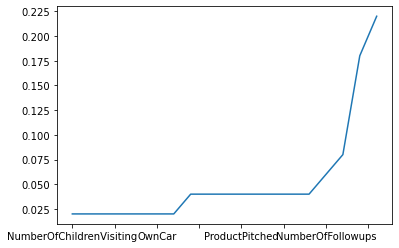

In [106]:
s1.sort_values().plot()

<AxesSubplot:>

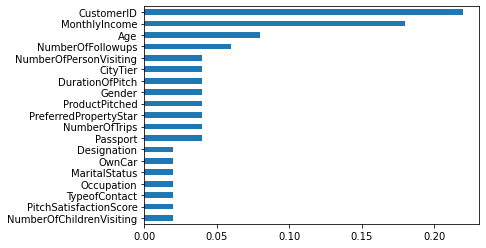

In [108]:
s1.sort_values().plot(kind='barh')

In [ ]:
# try to increase accuracy by changing parameter

In [111]:
adb_clf = AdaBoostClassifier(n_estimators=200)
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [112]:
### Testing Data 

y_pred = adb_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

cnf = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = \n{cnf}")

clf = classification_report(y_test,y_pred)
print(f"Classificatio Report = \n{clf}")

Accuracy Score = 0.8663940013633266
Confusion Matrix = 
[[1153   38]
 [ 158  118]]
Classificatio Report = 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1191
           1       0.76      0.43      0.55       276

    accuracy                           0.87      1467
   macro avg       0.82      0.70      0.73      1467
weighted avg       0.86      0.87      0.85      1467



In [113]:
### Training Data 

y_pred = adb_clf.predict(x_train)

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

cnf = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix = \n{cnf}")

clf = classification_report(y_train,y_pred)
print(f"Classificatio Report = \n{clf}")

Accuracy Score = 0.8754750073078047
Confusion Matrix = 
[[2698   79]
 [ 347  297]]
Classificatio Report = 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2777
           1       0.79      0.46      0.58       644

    accuracy                           0.88      3421
   macro avg       0.84      0.72      0.75      3421
weighted avg       0.87      0.88      0.86      3421



In [114]:
adb_clf = AdaBoostClassifier(n_estimators=200,learning_rate=0.5,random_state=5)
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=5)

In [115]:
### Testing Data 

y_pred = adb_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {acc}")

cnf = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix = \n{cnf}")

clf = classification_report(y_test,y_pred)
print(f"Classificatio Report = \n{clf}")

Accuracy Score = 0.8684389911383776
Confusion Matrix = 
[[1161   30]
 [ 163  113]]
Classificatio Report = 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1191
           1       0.79      0.41      0.54       276

    accuracy                           0.87      1467
   macro avg       0.83      0.69      0.73      1467
weighted avg       0.86      0.87      0.85      1467



In [116]:
### Training Data 

y_pred = adb_clf.predict(x_train)

acc = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {acc}")

cnf = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix = \n{cnf}")

clf = classification_report(y_train,y_pred)
print(f"Classificatio Report = \n{clf}")

Accuracy Score = 0.869921075708857
Confusion Matrix = 
[[2721   56]
 [ 389  255]]
Classificatio Report = 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2777
           1       0.82      0.40      0.53       644

    accuracy                           0.87      3421
   macro avg       0.85      0.69      0.73      3421
weighted avg       0.86      0.87      0.85      3421

